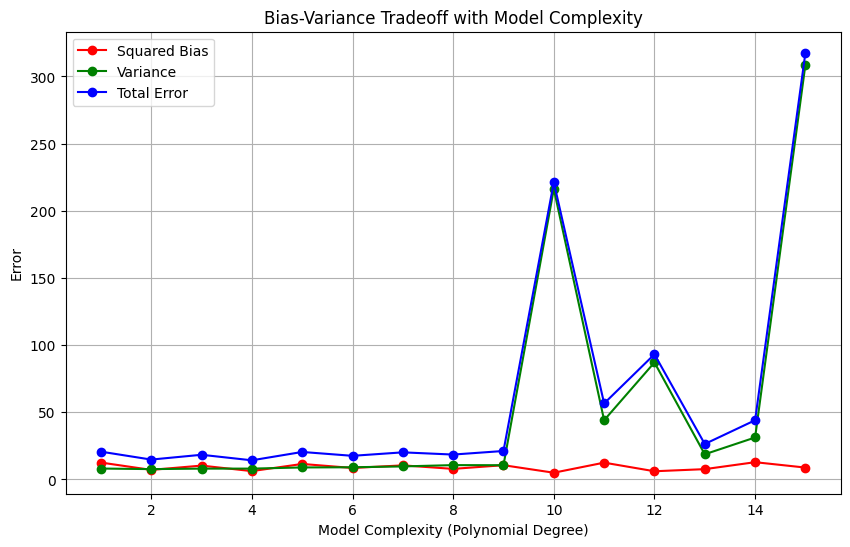

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Function to generate true y values without noise
def true_function(x):
    return x + np.sin(1.5 * x)

def generate_dataset(n_points=50):
    x = np.random.uniform(0, 10, size=n_points)  # Random x values in range [0, 10]
    noise = np.random.normal(0, np.sqrt(0.3), size=n_points)  # Noise term
    y = true_function(x) + noise  # Noisy observations
    return x, y

# Compute squared bias, variance, and error
def compute_bias_variance_error(predictions, y_true):
    mean_prediction = np.mean(predictions, axis=0)
    squared_bias = np.mean((mean_prediction - y_true) ** 2)
    variance = np.mean(np.var(predictions, axis=0))
    total_error = np.mean(np.mean((predictions - y_true) ** 2, axis=0))
    return squared_bias, variance, total_error

# Parameters
n_datasets = 100
n_train = 40  # 80% of 50
n_test = 10   # 20% of 50
degrees = np.arange(1, 16)  # Polynomial degrees from 1 to 15

# Arrays to store bias, variance, and error for each degree
biases = np.zeros(len(degrees))
variances = np.zeros(len(degrees))
errors = np.zeros(len(degrees))

# Generate 100 datasets and fit models of varying complexity
for degree_idx, degree in enumerate(degrees):
    all_predictions = []

    for _ in range(n_datasets):
        # Generate a dataset and split into training and testing sets
        x, y = generate_dataset()
        indices = np.random.permutation(len(x))
        train_idx, test_idx = indices[:n_train], indices[n_train:]
        x_train, y_train = x[train_idx], y[train_idx]
        x_test, y_test = x[test_idx], y[test_idx]

        # Fit the polynomial model of current degree
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x_train[:, np.newaxis], y_train)

        # Predict on the test set
        y_pred_test = model.predict(x_test[:, np.newaxis])
        all_predictions.append(y_pred_test)

    # Convert all predictions to a numpy array for further calculations
    all_predictions = np.array(all_predictions)

    # Compute bias, variance, and total error for this degree
    squared_bias, variance, total_error = compute_bias_variance_error(all_predictions, y_test)

    # Store the results
    biases[degree_idx] = squared_bias
    variances[degree_idx] = variance
    errors[degree_idx] = total_error

# Plot the results: bias, variance, and total error
plt.figure(figsize=(10, 6))
plt.plot(degrees, biases, label='Squared Bias', color='red', marker='o')
plt.plot(degrees, variances, label='Variance', color='green', marker='o')
plt.plot(degrees, errors, label='Total Error', color='blue', marker='o')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff with Model Complexity')
plt.legend()
plt.grid(True)
plt.show()
